In [577]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading

In [578]:
# Importing csv file
df=pd.read_csv("Global+Superstore+Data.csv")
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [579]:
# To know the shape of the data
df.shape

(51290, 5)

In [580]:
# To know the  stastical datset
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [581]:
# to know the datatypes of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
Order Date    51290 non-null object
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Profit        51290 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


### Handling datetime column

In [582]:
# Converting order date to time format 
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
# Introducing the month feature to aggregte the values month-wise later
df['Month'] = df['Order Date'].dt.strftime('%Y-%m')
df['Month'] = pd.to_datetime(df['Month'],format="%Y-%m")
# indexing to Order date
df = df.set_index('Order Date')

In [583]:
df.head(2)

,Segment,Market,Sales,Profit,Month
Order Date,,,,,
2012-07-31,Consumer,US,2309.650,762.1845,2012-07-01
2013-02-05,Corporate,APAC,3709.395,-288.7650,2013-02-01


### Data Preparation

### Preparing Data to Calculate Coefficient of Variation (CoV)

The coefficient of variation is a ratio of the standard deviation to mean. When we carefully observe the dataset, we can see that among the available market segments, the mean of the profits for these market segments varies quite a bit. Also, the standard deviation for the profits varies in a similar manner and it is meaningless to compare standard deviations across all the market segments. As a better metric to compare the variance between the segments, we will use the coefficient of variation. It normalises the standard deviation and gives us a comparative figure on the basis of which we can identify the most profitable market segment.

The data first of all will be prepared in order to calculate CoV

In [584]:
# Create new column Seg_mark
df["Seg_mark"]=df["Market"].str.cat(df["Segment"],sep=" ")

In [585]:
df.head()

,Segment,Market,Sales,Profit,Month,Seg_mark
Order Date,,,,,,
2012-07-31,Consumer,US,2309.650,762.1845,2012-07-01,US Consumer
2013-02-05,Corporate,APAC,3709.395,-288.7650,2013-02-01,APAC Corporate
2013-10-17,Consumer,APAC,5175.171,919.9710,2013-10-01,APAC Consumer
2013-01-28,Home Office,EU,2892.510,-96.5400,2013-01-01,EU Home Office
2013-11-05,Consumer,Africa,2832.960,311.5200,2013-11-01,Africa Consumer


In [586]:
df["Seg_mark"].value_counts()

APAC Consumer         5699
LATAM Consumer        5321
US Consumer           5191
EU Consumer           5186
APAC Corporate        3283
EU Corporate          3077
LATAM Corporate       3053
US Corporate          3020
EMEA Consumer         2538
Africa Consumer       2381
APAC Home Office      2020
LATAM Home Office     1920
US Home Office        1783
EU Home Office        1737
EMEA Corporate        1574
Africa Corporate      1312
EMEA Home Office       917
Africa Home Office     894
Canada Consumer        202
Canada Corporate       110
Canada Home Office      72
Name: Seg_mark, dtype: int64

There are 21 market segmenta  are there

In [587]:
# Droping both Segment and Market column 
df.drop(["Segment"],inplace=True,axis=1)
df.drop(["Market"],inplace=True,axis=1)

In [588]:
 df.head(2)

,Sales,Profit,Month,Seg_mark
Order Date,,,,
2012-07-31,2309.650,762.1845,2012-07-01,US Consumer
2013-02-05,3709.395,-288.7650,2013-02-01,APAC Corporate


In [589]:
# Grouping by Market-Segment to calculate total profit for each market segment
df_grouped = df.groupby(['Seg_mark'])['Profit'].sum()
df_grouped = pd.DataFrame(df_grouped)
df_grouped

,Profit
Seg_mark,
APAC Consumer,222817.56040
APAC Corporate,129737.23480
APAC Home Office,83445.25380
Africa Consumer,47772.09900
Africa Corporate,20686.96500
Africa Home Office,20412.56700
Canada Consumer,9677.70000
Canada Corporate,5036.46000
Canada Home Office,3103.23000


Looks like APAC Consumer is the most profitable of all market segments

In [590]:
# Lets see it the other way
pivot = pd.pivot_table(df,index = 'Month', columns = 'Seg_mark', values = 'Profit', aggfunc = 'sum')
pivot

Seg_mark,APAC Consumer,APAC Corporate,APAC Home Office,Africa Consumer,Africa Corporate,Africa Home Office,Canada Consumer,Canada Corporate,Canada Home Office,EMEA Consumer,...,EMEA Home Office,EU Consumer,EU Corporate,EU Home Office,LATAM Consumer,LATAM Corporate,LATAM Home Office,US Consumer,US Corporate,US Home Office
Month,,,,,,,,,,,,,,,,,,,,,
2011-01-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.70,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.3600,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02-01,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.0410,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03-01,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.2230,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04-01,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.8580,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05-01,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.1020,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088
2011-06-01,4328.2596,1435.8294,3452.1018,-1290.639,-259.218,-774.801,7.50,40.08,23.40,-267.030,...,-2371.776,4317.4515,2270.8170,1210.2930,1039.27972,2558.46696,643.69764,3486.7664,67.0149,1422.7431
2011-07-01,1258.9617,525.4647,-42.0498,621.168,134.847,-506.562,47.28,528.33,8.40,-942.603,...,-150.114,760.6920,916.9500,418.9350,1906.45620,303.29032,363.28400,-2227.2786,1308.7058,77.0902
2011-08-01,775.8066,4070.5581,775.7616,232.917,915.885,1090.200,43.68,29.70,NaN,285.270,...,183.276,5498.6715,1626.2670,184.6140,1946.89372,180.54028,661.66792,2157.7522,2245.4838,914.8690
2011-09-01,5181.4449,1952.4675,623.3595,-86.163,950.766,1345.740,134.01,10.17,NaN,1012.101,...,1151.358,5921.8785,5390.6625,2492.9010,1632.48620,386.77900,179.39744,8312.1203,-948.1010,964.0801


We have 48 months of data in total. Now, lets take the last 6 months as test data ands the rest as train data. Then lets calculate the CoV to find out the most profitable Market Segment.

In [591]:
# Splitting train and test 
train_pivot = pivot[:42]
test_pivot = pivot[42:]

### Finding the most profitable Market Segment using Coeffecient of Variation

In [592]:
CoV = train_pivot.std(axis = 0)/train_pivot.mean(axis = 0)
CoV = pd.DataFrame(CoV, columns = ['CoV'])
CoV = CoV.sort_values(by = 'CoV')
CoV

,CoV
Seg_mark,
APAC Consumer,0.603633
EU Consumer,0.655334
LATAM Consumer,0.688935
EU Corporate,0.697702
APAC Corporate,0.740799
LATAM Corporate,0.890930
US Corporate,1.039660
APAC Home Office,1.061530
US Consumer,1.108571


Seems like APAC Consumer is the clear winner as it has the least CoV of all the Market Segments. Now, from this point onwards, I would forecast the sales for this Market-Segment.

In [593]:
# Filtering the Seg_mark for APAC Consumer5
df = df.loc[df['Seg_mark'] == 'APAC Consumer']
df.head()

,Sales,Profit,Month,Seg_mark
Order Date,,,,
2013-10-17,5175.171,919.971,2013-10-01,APAC Consumer
2011-11-07,1822.080,564.840,2011-11-01,APAC Consumer
2012-04-14,5244.840,996.480,2012-04-01,APAC Consumer
2013-06-06,3701.520,1036.080,2013-06-01,APAC Consumer
2012-02-25,1878.720,582.360,2012-02-01,APAC Consumer


In [594]:
#Preperation of dataset with month and sales colmumn
df = df.groupby('Month')['Sales'].sum()
df = pd.DataFrame(df)
df

,Sales
Month,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723
2011-06-01,27260.0196
2011-07-01,15842.8317
2011-08-01,22012.2366
2011-09-01,34613.1849


In [595]:
df.shape

(48, 1)

In [596]:
#Splitting train and test datset
train_len = 42
train = df[0:train_len] # first 42 months as training set
test = df[train_len:]

In [597]:
# reading the train dataset
train.head()

,Sales
Month,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


In [598]:
#Shape of train datset
train.shape

(42, 1)

In [599]:
#Shape of test dataset
test.shape

(6, 1)

### Time-Series Analysis

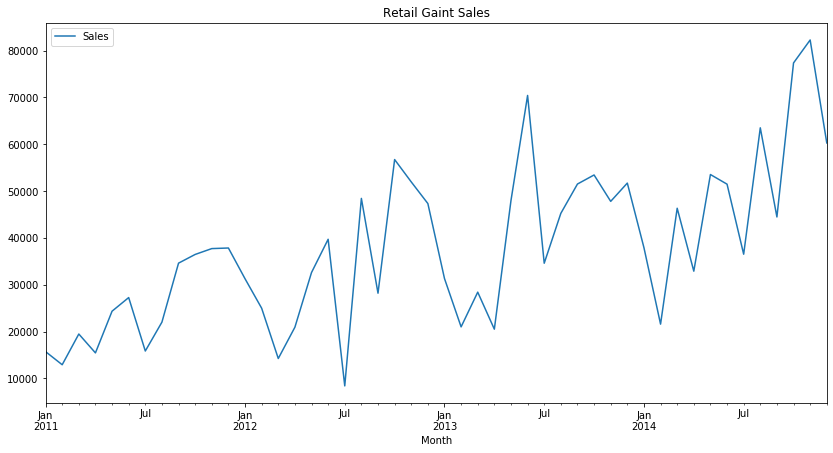

In [600]:
# Lets try plotting the series first to see the possible patterns like trend and seasonality

df.plot(figsize = [14,7])
plt.legend(loc = 'best')
plt.title('Retail Gaint Sales')
plt.show(block=False)


Seems like it has an upward trend and some seasonal components as well. Also, as seen from the above plot, there are no missing values

### Outlier detection

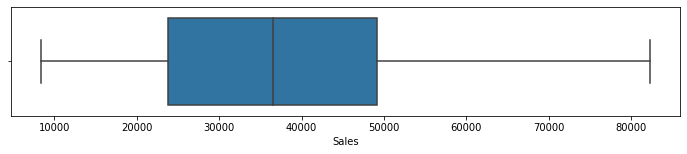

In [601]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=df['Sales'],whis=1.5)

No outlier  is present

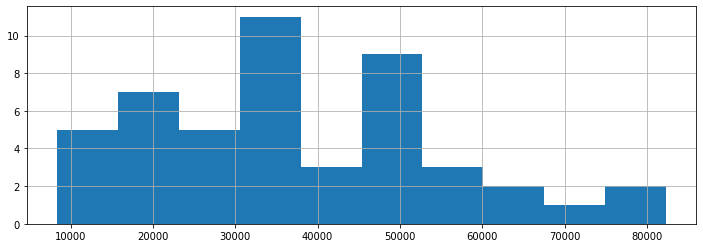

In [602]:
fig = df.Sales.hist(figsize = (12,4))

### Time series Decomposition

Additive seasonal decomposition

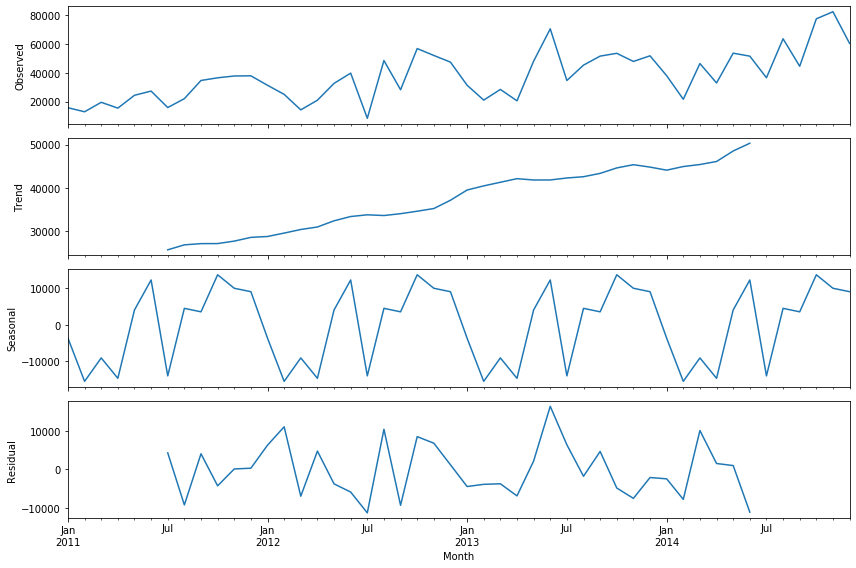

In [603]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

Multiplicative seasonal decomposition

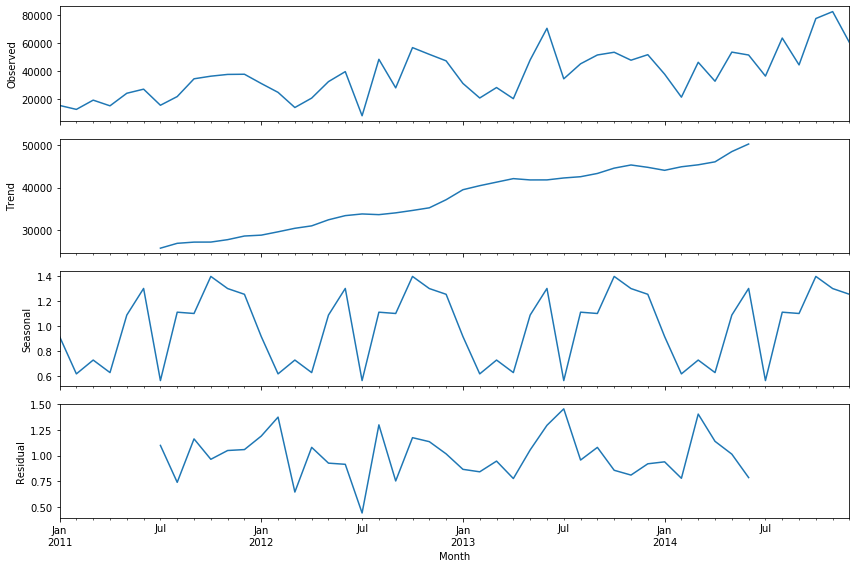

In [604]:
decomposition = sm.tsa.seasonal_decompose(df.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

The consistently incresing trend is quite evident. Also, the seasonality extract shows the dip in Sales every year in the month of July. The middle months show higher sales in general.

# Build and evaluate time series forecast

## Simple time series methods

### Naive method

In [605]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

Plot train, test and forecast

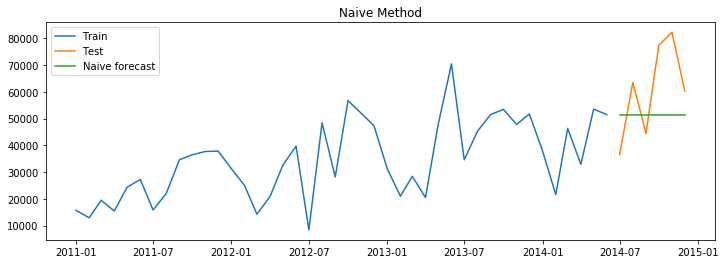

In [606]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

Calculate RMSE and MAPE

In [607]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


### Simple average method

In [608]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

Plot train, test and forecast

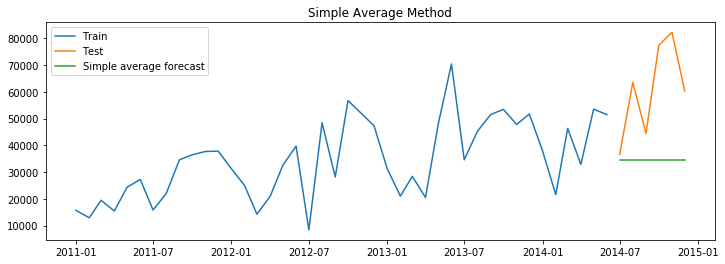

In [609]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

Calculate RMSE and MAPE

In [610]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


### Simple moving average method

In [611]:
y_hat_sma = df.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = df['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

Plot train, test and forecast

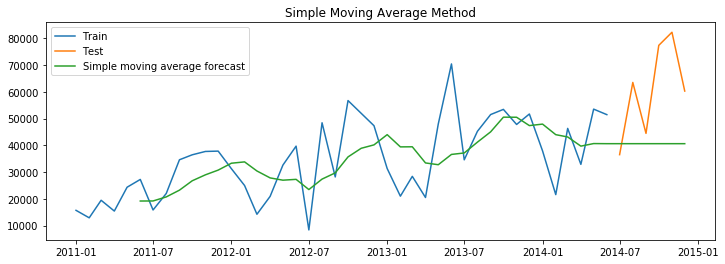

In [612]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

Calculate RMSE and MAPE

In [613]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11


### Exponential smoothing methods

### Simple exponential smoothing

In [614]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plot train, test and forecast

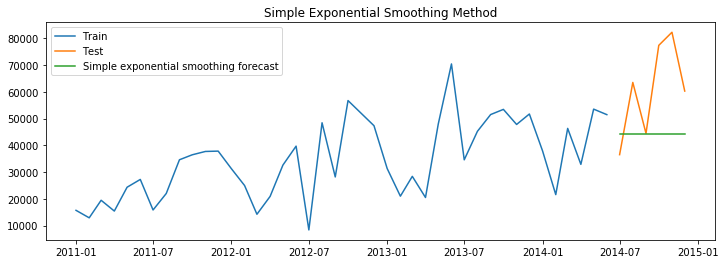

In [615]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

Calculate RMSE and MAPE

In [616]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82


### Holt's method with trend

In [617]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
# model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
model_fit = model.fit( optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(6)

{'smoothing_level': 5.0949797475594565e-11, 'smoothing_slope': 4.867791941471747e-12, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 16541.393420583274, 'initial_slope': 807.9151163828058, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Plot train, test and forecast

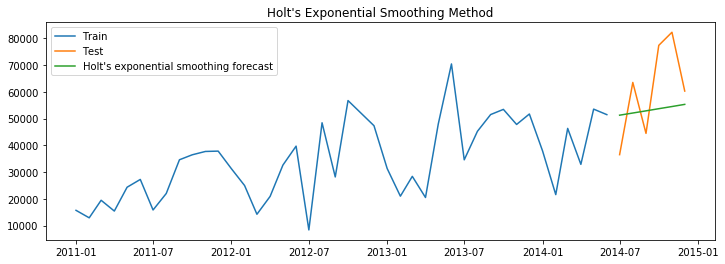

In [618]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

Holt's Exponential captures trend as well

Calculate RMSE and MAPE

In [619]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,17204.15,24.99


### Holt Winters' additive method with trend and seasonality

In [620]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474944, 'damping_slope': nan, 'initial_level': 29061.291899999593, 'initial_slope': 730.4167145833245, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Plot train, test and forecast

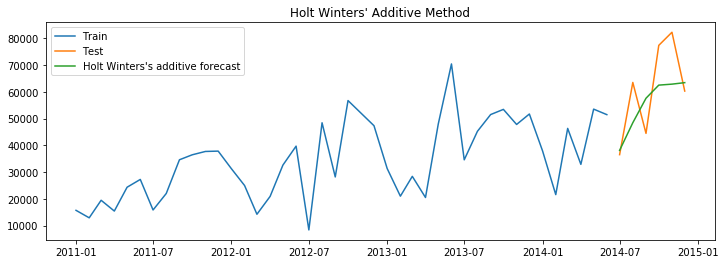

In [621]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

Calculate RMSE and MAPE

In [622]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61


### Holt Winter's multiplicative method with trend and seasonality

In [623]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.291900000004, 'initial_slope': 730.4167145833347, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Plot train, test and forecast

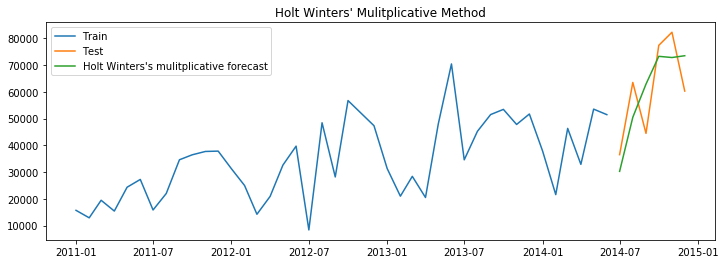

In [624]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

Calculate RMSE and MAPE

In [625]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62



Clearly, since the time-series data has seasonality as we saw during the decomposition, Holt Winters Methods perform the best as they capture the seasonal component, giving the least errors. We can prefer the Holt Winters' Additive method amongst all the smoothing techniques applied on the data. But lets further proceed to applying some autoregressive techniques as well.

# Auto Regressive methods


There are 2 assumptions that are taken before applying Auto Regressive methods.

Stationarity: The time series need to be stationary. It should have a constant mean and variance thorughout, along with a consistent covariance at a fixed lag. It should not show any trend or seasonality patterns.

Auto-correlation: The variables are dependent and are influenced by their own lagged values.
Two formal tests for stationarity based on Hypothesis testing are ADF and KPSS tests.

### Stationarity vs non-stationary time series

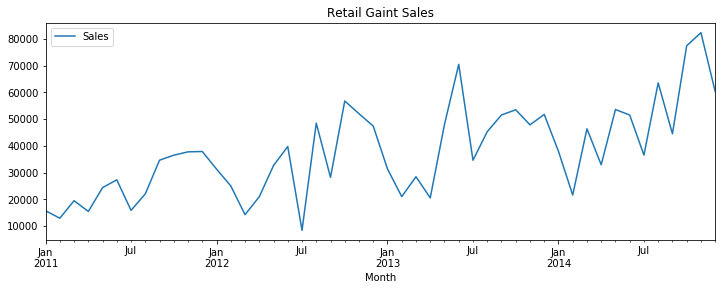

In [626]:
df['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Gaint Sales')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [627]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [628]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


As we saw through above two tests, the time series is not stationary. Now, we need to make it stationary. We will use Box-cox transformation to make the variance constant and use first order differencing to make the mean constant.

### Box Cox transformation to make variance constant

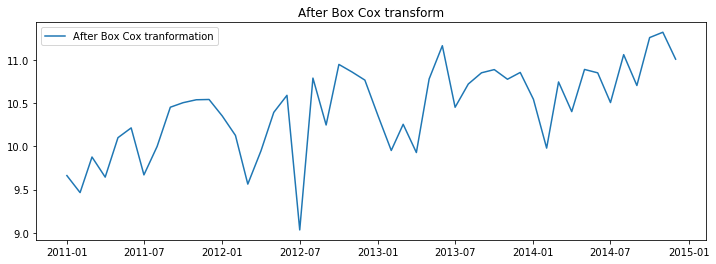

In [629]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df['Sales'], lmbda=0), index = df.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

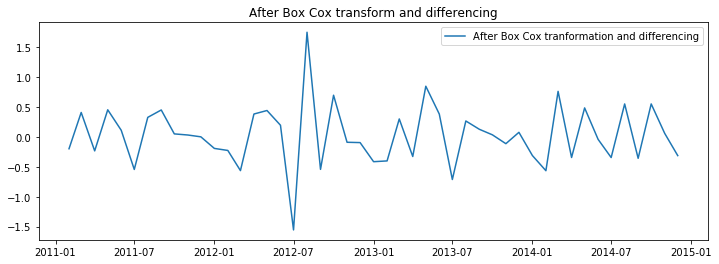

In [630]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()


Looks much more stationary than before. Good to proceed with the 2nd assumption now

In [631]:
data_boxcox_diff.dropna(inplace=True)

In [632]:
data_boxcox_diff.tail()

Month
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [633]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [634]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


The given series is converted to stationary

### Autocorrelation function (ACF)


This function tells us about the correlation between an observation with its lagged values. It helps in determining which lag of the observation is influencing the most. Also, ACF captures both direct and indirect relationships between the observations.

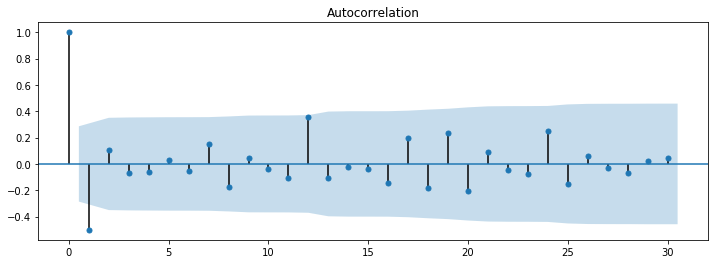

In [635]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

### Partial Auto-Correaltion Function (PACF)

PACF captures only the direct relationships between the variables and the lagged values.

C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


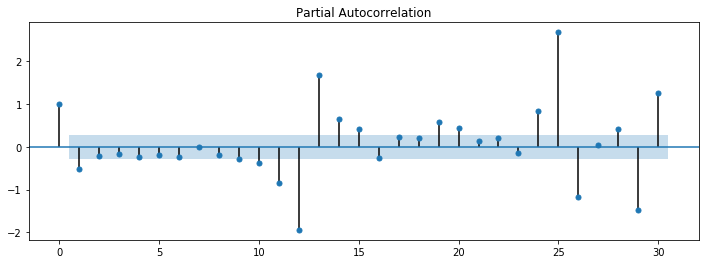

In [636]:
# Import plot_pacf function from statsmodels library

from statsmodels.graphics.tsaplots import plot_pacf

# Plot the Partial Autocorrelation function (PACF)

plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

Both the assumptions have been satisfied, lets proceed with model building.

In [637]:
#Splitting data into train and test 
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [638]:
train_data_boxcox_diff

Month
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
2011-07-01   -0.542704
2011-08-01    0.328881
2011-09-01    0.452636
2011-10-01    0.052311
2011-11-01    0.033713
2011-12-01    0.003292
2012-01-01   -0.190545
2012-02-01   -0.224703
2012-03-01   -0.562166
2012-04-01    0.384877
2012-05-01    0.443562
2012-06-01    0.197027
2012-07-01   -1.554595
2012-08-01    1.753416
2012-09-01   -0.541343
2012-10-01    0.699452
2012-11-01   -0.087925
2012-12-01   -0.093177
2013-01-01   -0.412912
2013-02-01   -0.400011
2013-03-01    0.302394
2013-04-01   -0.326054
2013-05-01    0.849926
2013-06-01    0.383940
2013-07-01   -0.710954
2013-08-01    0.268477
2013-09-01    0.129600
2013-10-01    0.036881
2013-11-01   -0.111427
2013-12-01    0.078506
2014-01-01   -0.310206
2014-02-01   -0.563617
2014-03-01    0.764032
2014-04-01   -0.342611
2014-05-01    0.487122
2014-06-01   -0.039254
dtype: float64

## Auto regression method (AR)

In [639]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Recover original time series

In [640]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

Plot train, test and forecast

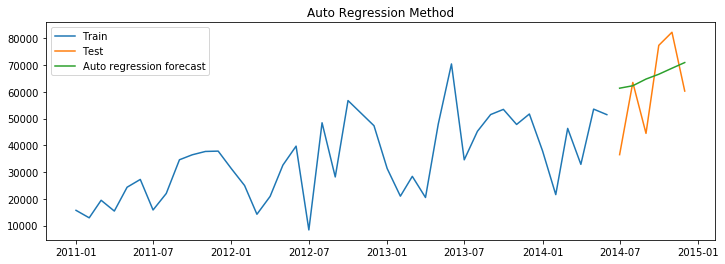

In [641]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

Calculate RMSE and MAPE

In [642]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27


### Moving average method (MA)

In [643]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.022694
ma.L1.y   -1.000000
dtype: float64


Recover original time series

In [644]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

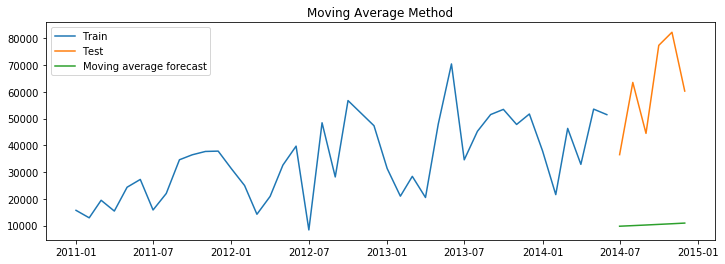

In [645]:
plt.figure(figsize=(12,4))
plt.plot(df['Sales'][:train_len], label='Train')
plt.plot(df['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

Calculate RMSE and MAPE

In [646]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64


### Auto regression moving average method (ARMA)

In [647]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999969
dtype: float64


Recover original time series

In [648]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

Plot train, test and forecast

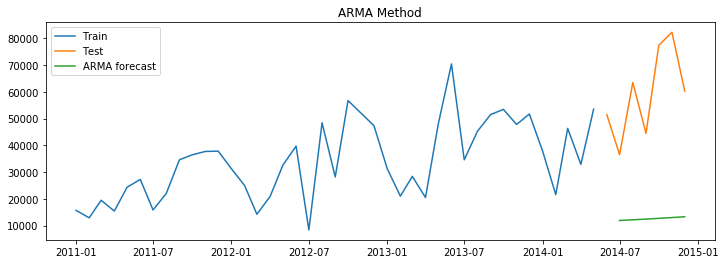

In [649]:
plt.figure(figsize=(12,4))
plt.plot( df['Sales'][:train_len-1], label='Train')
plt.plot(df['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

Calculate RMSE and MAPE

In [650]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


### Auto regressive integrated moving average (ARIMA)

In [651]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999969
dtype: float64


Recover original time series forecast

In [652]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

Plot train, test and forecast

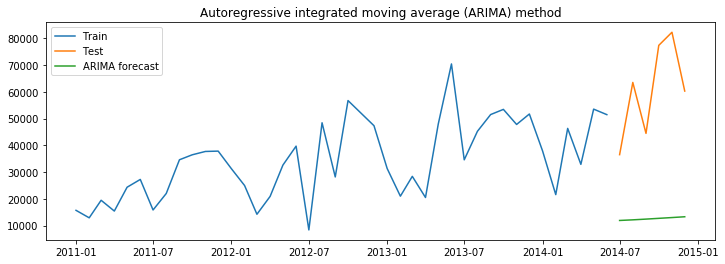

In [653]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

Calculate RMSE and MAPE

In [654]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


### Seasonal auto regressive integrated moving average (SARIMA)

In [655]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\Prathima CN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1      -0.060969
ma.L1      -0.995440
ar.S.L12   -0.709637
sigma2      0.084622
dtype: float64


Recover original time series forecast

In [656]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

Plot train, test and forecast

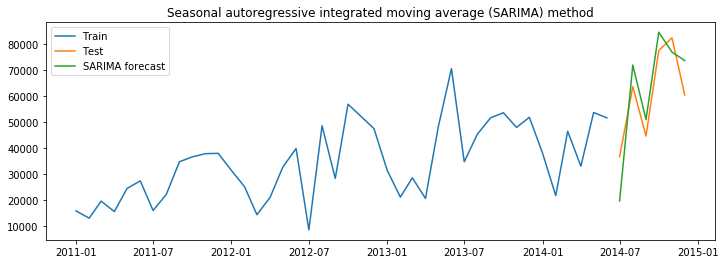

In [657]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

Calculate RMSE and MAPE

In [658]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,25911.05,31.11
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


Amongst the autoregressive models, SARIMA method gave us the best plot and least MAPE value, since there was seasonality in the data to deal with. We can therefore prefer SARIMA amongst all the autoregressive methods.

### Conclusion

After applying each of the above techniques and forecasting the Sales for the next 6 months, we can conclude that Holt Winter's Additive Method amongst the smoothing techniques and SARIMA Method amongst the autoregressive methods were able to best predict the sales closest to the actual values, also their MAPE values is the least amongst the lot. This gives us conclusive evidence supporting the fact that these 2 methods provide the best models in this case.